In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Check: Are we able to reduce the dimensionality of the data without loosing too much information?

In [3]:
# Plot the cumulative variance for different number of principal components

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load the data into the format x_data.shape = num_samples , num_features

#X_data
#y_data


# standarization of data, in order to see if features with smaller range contribute more to the principal components
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_data)

#PCA to explore if it is possible to reduce dimensionality without losing too much information

#Create a Covariance Matrix
covar_matrix = PCA(n_components = min(num_samples,num_features)-1)

#calculate eigenvalues
covar_matrix.fit(data_rescaled)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)

plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.plot(var)

In [5]:
# An auxilary method for ploting the 2d projections of PCA

In [6]:
def plot_2d_label(X_2d, y, ax=None, s=2, alpha=0.5, lw=2):
    """Visualise a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional projection of the original data.
    
    y : ndarray, shape (n_samples,)
        Labels for the respective samples in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    
    targets = np.unique(y)  # extract the unique number of labels
    colors = sns.color_palette(n_colors=targets.size)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    # scatter plot    
    for color, target in zip(colors, targets):
        ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax

In [ ]:
# run the PCA algorithm for two principal components and plot the projections

In [ ]:
covar_matrix = PCA(n_components = 2) #40 features covers ~98% variance

#calculate eigenvalues
covar_matrix.fit(data_rescaled)

X_pca = covar_matrix.transform(data_rescaled)
plot_2d_label(X_pca, labels, ax=None, s=2, alpha=0.5, lw=10)

In [7]:
# An example of this code on the iris dataset

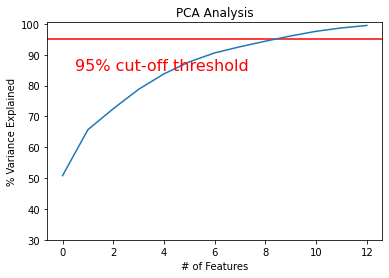

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load the data into the format x_data.shape = num_samples , num_features

data=pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\wine.data.csv')
data = data.to_numpy()

num_samples, num_features = data.shape

labels = np.zeros(num_samples)

for i in range(0,len(labels)):
    if(i<58):
        labels[i] = 0
    elif(i>=58 and i<130):
        labels[i]=1
    else:
        labels[i]=2

        
# standarization of data, in order to see if features with smaller range contribute more to the principal components
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

#PCA to explore if it is possible to reduce dimensionality without losing too much information

#Create a Covariance Matrix
covar_matrix = PCA(n_components = min(num_samples,num_features)-1)

#calculate eigenvalues
covar_matrix.fit(data_rescaled)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)

plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.plot(var)

In [18]:
# The plot demonstrates that the first 8 principal components contains the 95% of the information of the original data

<AxesSubplot:>

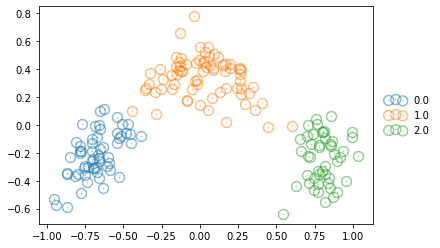

In [19]:
covar_matrix = PCA(n_components = 2) #40 features covers ~98% variance

#calculate eigenvalues
covar_matrix.fit(data_rescaled)

X_pca = covar_matrix.transform(data_rescaled)
plot_2d_label(X_pca, labels, ax=None, s=2, alpha=0.5, lw=10)